In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import StandardScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
df=pd.read_csv('Train_Data_Final.csv')
#df.head()

In [3]:
df_num=df.select_dtypes(np.number)
df_num.head()

,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min,Total_Duration
0,0,0,3897.000000,24,3,2019,1,10,22,20,2,50,170.000000
1,2,0,7662.000000,5,1,2019,13,15,5,50,7,25,445.000000
2,2,0,13882.000000,6,9,2019,4,25,9,25,19,0,1140.000000
3,1,0,6218.000000,5,12,2019,23,30,18,5,5,25,325.000000
4,1,0,13302.000000,3,1,2019,21,35,16,50,4,45,285.000000


In [4]:
df_num.Year.value_counts()

2019    10682
Name: Year, dtype: int64

In [5]:
df_num=df_num.drop('Year',axis=1)

In [6]:
dummies=pd.get_dummies(df[['Airline', 'Source', 'Destination']],drop_first=True)

In [7]:
df2 = pd.concat([df_num,dummies], axis=1)
df2.shape

(10682, 29)

In [8]:
X=df2.drop('Price',axis=1)
Y=df2['Price']

In [9]:
X.shape

(10682, 28)

In [10]:
SS=StandardScaler()
X_scaled=pd.DataFrame(SS.fit_transform(X),columns=X.columns)

In [11]:
X_scaled=sm.add_constant(X_scaled)
X_scaled.shape

(10682, 29)

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,Y,random_state=1,test_size=0.30)

In [13]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7477, 29)
(3205, 29)
(7477,)
(3205,)


### Linear Regression Full Model 

In [14]:
MLR_full_model = sm.OLS(y_train, X_train).fit()

In [15]:
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     554.9
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:11   Log-Likelihood:                -69295.
No. Observations:                7477   AIC:                         1.386e+05
Df Residuals:                    7452   BIC:                         1.388e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [16]:
var=pd.DataFrame(MLR_full_model.pvalues,columns=['pval'])
significant_var=var[var['pval'] < 0.05]
significant_var

,pval
const,0.000000
Total_Stops,0.000000
Additional_Info,0.000000
Day,0.000000
Month,0.000000
Arrival_Time_hr,0.005040
Arrival_Time_min,0.017736
Dep_Time_hr,0.003603
Duration_hr,0.038811
Total_Duration,0.030997


### Linear Regression (significant variables)

In [17]:
X_signi=X_scaled[significant_var.index]

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X_signi,Y,random_state=1,test_size=0.30)

In [19]:
MLR_full_model = sm.OLS(y_train, X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:11   Log-Likelihood:                -69300.
No. Observations:                7477   AIC:                         1.386e+05
Df Residuals:                    7459   BIC:                         1.388e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Handling Multicolinearity

In [20]:
 for ind in range(len(X_signi.columns)):
    
   
    vif = pd.DataFrame()

    vif["VIF_Factor"] = [variance_inflation_factor(X_signi.values, i) for i in range(X_signi.shape[1])]

  
    vif["Features"] = X_signi.columns

    multi = vif[vif['VIF_Factor'] > 10]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
 
    if (df_sorted.empty == False):
        X_signi = X_signi.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     1.000000                      const
1     2.863987                Total_Stops
2     1.330843            Additional_Info
3     1.099245                        Day
4     1.104419                      Month
5     1.057002            Arrival_Time_hr
6     1.083469           Arrival_Time_min
7     1.050038                Dep_Time_hr
8     2.567592             Total_Duration
9     1.865182          Airline_Air India
10    2.355902        Airline_Jet Airways
11    1.491488  Airline_Multiple carriers
12    1.426236           Airline_SpiceJet
13    1.189763            Airline_Vistara
14    1.453059          Destination_Delhi
15    1.235369      Destination_Hyderabad
16    1.105405      Destination_New Delhi


In [21]:
X_final=X_scaled[vif['Features'].to_list()]

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X_final,Y,random_state=1,test_size=0.30)
MLR_full_model = sm.OLS(y_train, X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     831.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:12   Log-Likelihood:                -69302.
No. Observations:                7477   AIC:                         1.386e+05
Df Residuals:                    7460   BIC:                         1.388e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model Evaluation

In [23]:
y_pred_test = MLR_full_model.predict(X_test)
y_pred_train = MLR_full_model.predict(X_train)

print('R-Squared:',MLR_full_model.rsquared)

print('R-Squared_adjusted:',MLR_full_model.rsquared_adj)

R-Squared: 0.6405833615333532
R-Squared_adjusted: 0.6398124947484382


In [24]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))

print('Train RMSE: ',rmse_train)
print('Test RMSE: ',rmse_test)

Train RMSE:  2564.944431048982
Test RMSE:  2464.542350042582


In [25]:
X_final=X_final.drop('Total_Duration',axis=1)

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X_final,Y,random_state=1,test_size=0.30)
MLR_full_model = sm.OLS(y_train, X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     886.1
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:13   Log-Likelihood:                -69303.
No. Observations:                7477   AIC:                         1.386e+05
Df Residuals:                    7461   BIC:                         1.387e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
y_pred_test = MLR_full_model.predict(X_test)
y_pred_train = MLR_full_model.predict(X_train)
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Train RMSE: ',rmse_train)
print('Test RMSE: ',rmse_test)

Train RMSE:  2565.2992780518757
Test RMSE:  2465.8271647838073


In [51]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

print('R-squared: ',np.mean(scores))

R-squared:  0.6383222010327515


### ElasticNet Regularization

In [30]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
EN_Model=enet.fit(X_train, y_train)

In [53]:
rmse_train_EN=np.sqrt(mean_squared_error(y_train,EN_Model.predict(X_train)))
rmse_test_EN=np.sqrt(mean_squared_error(y_test,EN_Model.predict(X_test)))

print('Train RMSE : ',rmse_train_EN)
print('Test RMSE : ',rmse_test_EN)

Train RMSE :  2565.299336660045
Test RMSE :  2465.8251820016612


In [34]:
r_sq = EN_Model.score(X_train, y_train)

r_sq

0.6330327559921738

In [35]:
enet = ElasticNet(alpha = 0.1, l1_ratio =1 , max_iter = 500)
EN_Model=enet.fit(X_train, y_train)

rmse_train_EN=np.sqrt(mean_squared_error(y_train,EN_Model.predict(X_train)))
rmse_test_EN=np.sqrt(mean_squared_error(y_test,EN_Model.predict(X_test)))

print('R_square :',EN_Model.score(X_train, y_train))
print(rmse_train_EN)
print(rmse_test_EN)

R_square : 0.6404838913029793
2565.299336660045
2465.8251820016612


### KNN Regression

In [54]:
wcss = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    wcss.append(error) #store rmse values
    print('RMSE value for k=' , K , 'is:', error)

RMSE value for k= 1 is: 2207.4820726547346
RMSE value for k= 2 is: 1988.242054371316
RMSE value for k= 3 is: 1860.8455804442694
RMSE value for k= 4 is: 1822.9555465420672
RMSE value for k= 5 is: 1804.8432873193149
RMSE value for k= 6 is: 1807.9954776182058
RMSE value for k= 7 is: 1812.952669517228
RMSE value for k= 8 is: 1817.0285029850527
RMSE value for k= 9 is: 1827.9422885816193
RMSE value for k= 10 is: 1838.787827853642
RMSE value for k= 11 is: 1843.1854281399487
RMSE value for k= 12 is: 1849.51180174351
RMSE value for k= 13 is: 1856.4373538103173
RMSE value for k= 14 is: 1875.402460695889
RMSE value for k= 15 is: 1882.1056206428295
RMSE value for k= 16 is: 1889.0323716968803
RMSE value for k= 17 is: 1893.214310084688
RMSE value for k= 18 is: 1904.4494000235989
RMSE value for k= 19 is: 1912.6309878877457
RMSE value for k= 20 is: 1922.6027054987485


<AxesSubplot:>

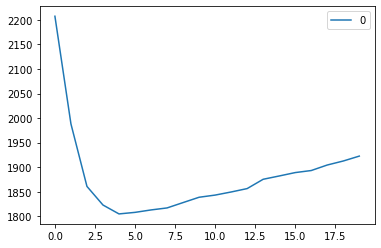

In [55]:
curve = pd.DataFrame(wcss) #elbow curve 
curve.plot()

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [59]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [60]:
knn.score(X_train,y_train)

0.8712107948109087

In [61]:
knn.score(X_test,y_test)

0.8169124440943016

In [62]:
rmse_train_knn=np.sqrt(mean_squared_error(y_train,knn.predict(X_train)))
rmse_test_knn=np.sqrt(mean_squared_error(y_test,knn.predict(X_test)))

print('Train RMSE :',rmse_train_knn)
print('Test RMSE :',rmse_test_knn)

Train RMSE : 1535.3896302896069
Test RMSE : 1804.8432873193149
